In [3]:
import qiskit 
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit_ibm_runtime import(
    EstimatorV2 as Estimator,
    QiskitRuntimeService,
)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Pauli, SparsePauliOp
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def deutsch_jozsa_oracle(n, oracle_type="balanced"):
    oracle = QuantumCircuit(n+1)
    
    if oracle_type == "o0":
        oracle.cx(0, n)
    
    elif oracle_type == "o1":
        oracle.cx(1, n)

    elif oracle_type == "o2":
        oracle.cx(0, n)
        oracle.cx(1, n)

    elif oracle_type == "o3":
        pass  
    elif oracle_type == "o4":
        oracle.x(n)

    return oracle


def deutsch_jozsa_algorithm(n, oracle_type="balanced"):
   
    dj_circuit = QuantumCircuit(n+1, n)

    dj_circuit.x(n)

    dj_circuit.h(range(n+1))

    oracle = deutsch_jozsa_oracle(n, oracle_type)
    dj_circuit.compose(oracle, inplace=True)

    dj_circuit.h(range(n))

    dj_circuit.measure(range(n), range(n))

    return dj_circuit


n = 2
oracle_type = "o4" 
dj_circuit = deutsch_jozsa_algorithm(n, oracle_type)

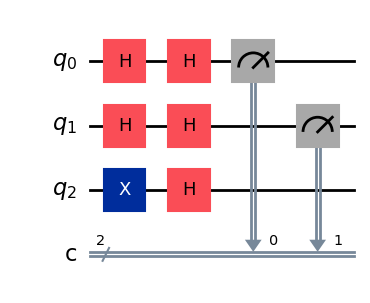

In [4]:
dj_circuit.draw(output="mpl")

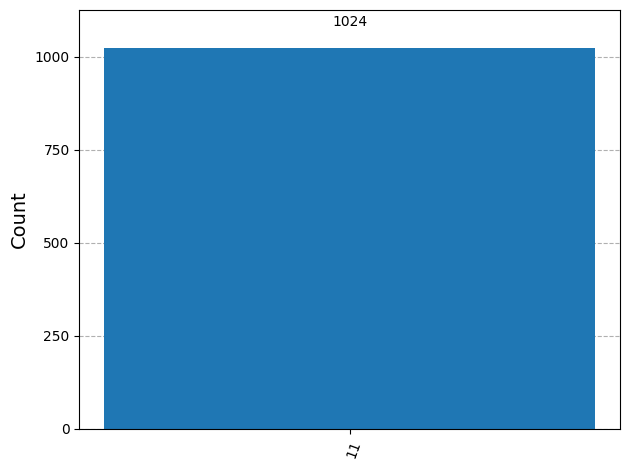

In [89]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(dj_circuit, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
service= QiskitRuntimeService(channel="ibm_cloud", 
                              token="........",
                              instance="..........")

In [90]:
backend_qc= service.backend(name="ibm_torino")

In [92]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm= generate_preset_pass_manager(optimization_level=1, backend=backend_qc)
transpilated_circuit= pm.run(dj_circuit)

In [91]:
sampler= Sampler(mode= backend_qc)

In [180]:
job= sampler.run([transpilated_circuit])

In [182]:
job.status()

'DONE'

In [183]:
result= job.result()
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-08-02 14:52:30', stop='2025-08-02 14:52:32', size=4096>)])}, 'version': 2})


{'11': 3914, '01': 39, '10': 107, '00': 36}


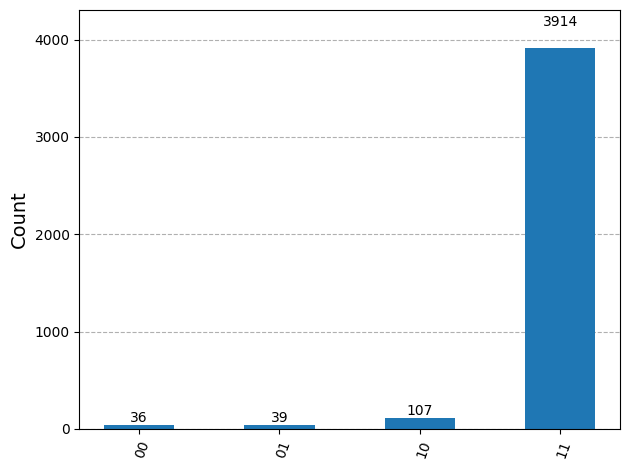

In [184]:
dj_circuit.cregs
counts= result[0].data['c'].get_counts()
print(counts)
plot_histogram(counts)